# Customer Churn Prediction | Sector : Bank

importing the necessary modules

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#loading the data set
df = pd.read_csv("churn.csv")

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


unwanted columns
- RowNumber
- CustomerId
- Surname

# Data Pre-processing

In [25]:
df.shape

(10000, 14)

Dropping unwanted columns :)

In [26]:
#removing unwanted columns
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


checking  Null values

In [28]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

checking the data types of columns

In [29]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

checking for duplicates values

In [30]:
df.duplicated().sum()

0

#### Here the churn is "Exited" column , i renamed it to " churn"

In [32]:
df.rename(columns={'Exited':'Churn'}, inplace=True)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Descriptive Statistics

In [34]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA | Exploratory Data Analysis

in the exploratory data analysis i will be looking for he distribution of the data, the coorelation between features and the target variable and the relationship between the features and the target variable.

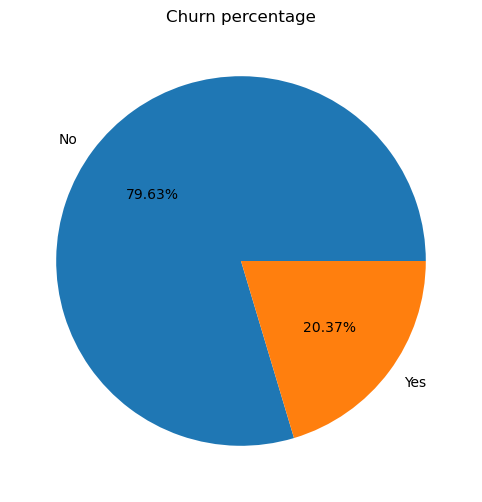

In [42]:
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title("Churn percentage")
plt.show()

after extracting the churn perdiction using pie chart , we got to know that, there are almost 80% does not churned and other 20% only churned 

### Gender

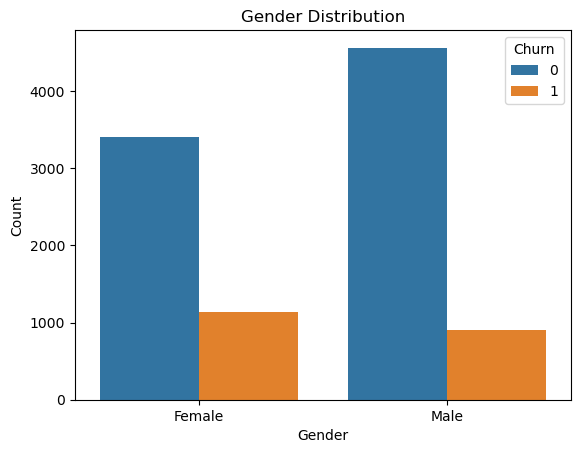

In [43]:
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

As shown in the graph, majority of the customers are male. But upon looking at the customer churn, we can see that females have more tendency to churn as compared to males. However there is not much difference between the churn count of the two genders so we cannot have a hypothesis regarding the customer churn based on the gender of the customer.

### Customer Location

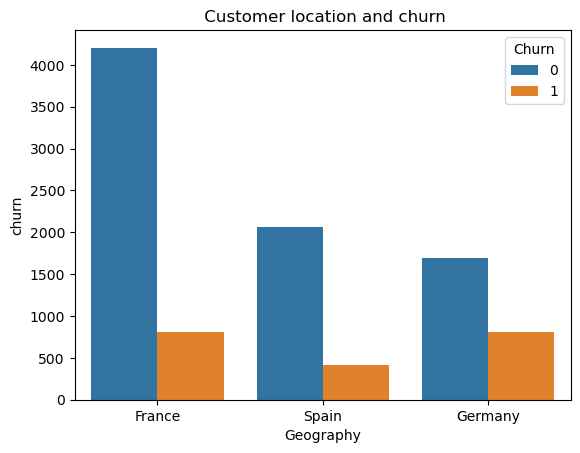

In [47]:
sns.countplot(x='Geography', hue='Churn',data = df)
plt.title(" Customer location and churn")
plt.xlabel("Geography")
plt.ylabel("churn")
plt.show()

this graph shows the number of customers from different countries and how many of them have left. Most customers are from France, then Spain, and Germany. However, Germany has the highest number of customers who left, followed by France and Spain. This means German customers are more likely to leave compared to customers from other countries.

### Age distribution

Text(0, 0.5, 'churn')

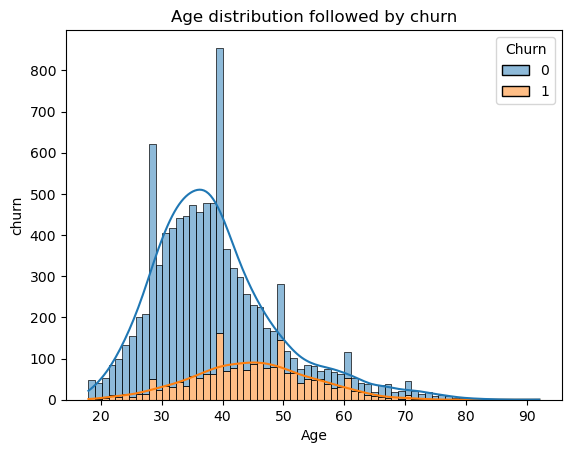

In [50]:
sns.histplot(x='Age',hue='Churn',data=df, multiple="stack",kde=True)
plt.title('Age distribution followed by churn')
plt.xlabel('Age')
plt.ylabel('churn')

This histtogram visualizes the age distribution and the churn count of the customers. The majority of the customers are from age group 30-40 years old. However the customer churn count is highest for the customersof age 40 and 50. In addition to that customers from age group 20-25 years old count for the lowest churn count. Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

### Credit Score

<Axes: xlabel='Churn', ylabel='CreditScore'>

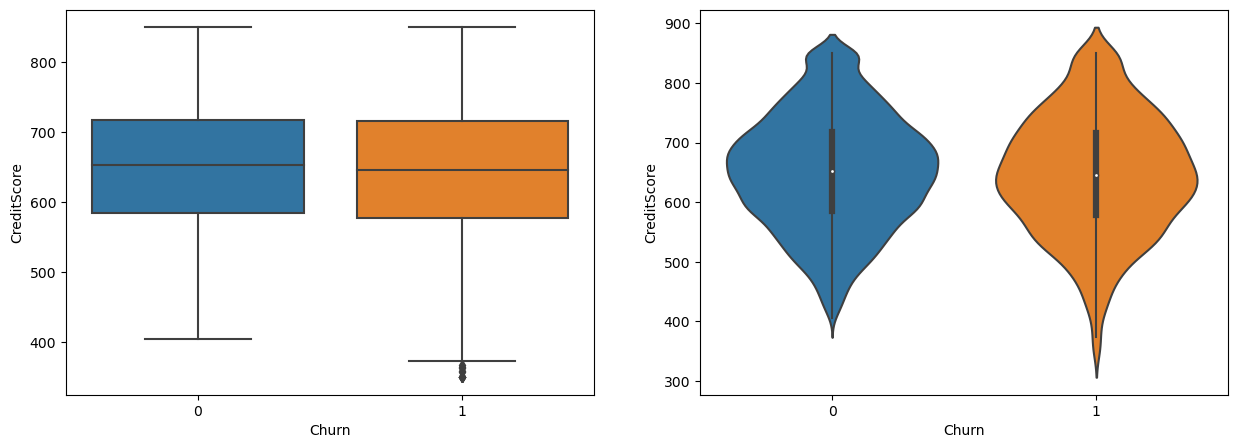

In [51]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=df, ax=ax[0])
sns.violinplot(x="Churn", y="CreditScore", data=df, ax=ax[1])

The boxplot and violinplot shows the distribution of curstomer's credit score along with their churn. In the boxplot, the median of both the churn and non churn customers are almost same. In addition to that, the shape of violinplot is also similar for both the churn and non churn customers. However some churn customers have low credit score, but on the whole, the credit score is not a good indicator of churn.

<Axes: xlabel='Tenure', ylabel='count'>

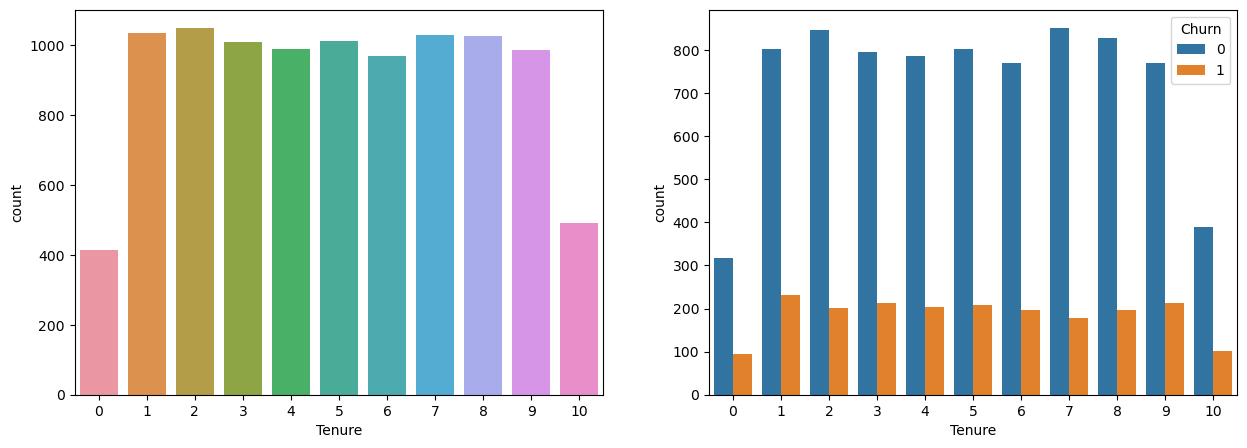

In [54]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df,ax=ax[1])

Tensure refers to the time (in years) that a customer has been a client of the bank. Majority of the customers in the dataset have a tenure between 1-9 years, having equal distribution among them. There are very few customers with a tenure of less than 1 years or more than 9 years. Looking at the churn of these customers based on their tenure, it can be observed that customers with tenure 1-9 years have higher churn count with maximum in customers with 1 year tenure followed those with 9 year tenure. However customers more than 9 years on tenure counts for the least churn. This is because the customers with higher tenure are more loyal to the bank and less likely to churn

<Axes: xlabel='Balance', ylabel='Count'>

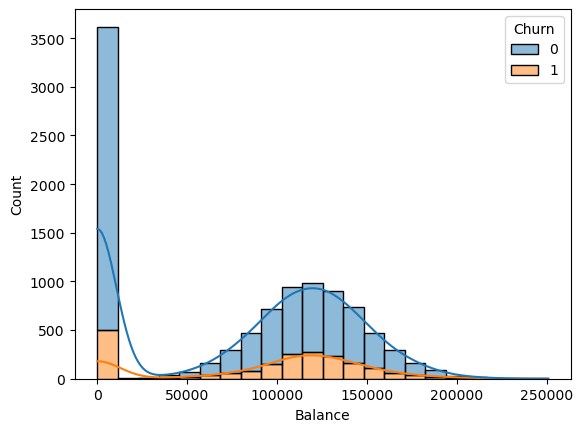

In [55]:
sns.histplot(x='Balance',hue='Churn',data=df, multiple="stack",kde=True)

A huge number of customers have zero bank balance which also resulted in them leaving the bank. However, customer having bank balance between 100000 to 150000 are more likely to leave the bank after the customers with zero bank balance.

### Number of Product Purchased

<Axes: xlabel='NumOfProducts', ylabel='count'>

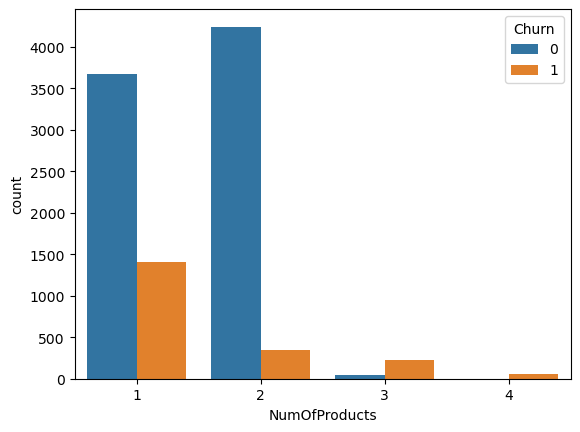

In [57]:
sns.countplot(data=df,x='NumOfProducts',hue='Churn')

In the dataset, we have customers in four categories according to the number of products purchased. The customers with purchase or 1 or 2 products are highest in number and have low churn count in comparison to the non churn customers in the category. However, in the category where customers have purchased 3 or 4 products the number of leaving customers is much higher than the non leaving customers. Therefore, the number of product purchased is a good indicator of customer churn.

In [58]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Has Credit-Cards

<Axes: xlabel='HasCrCard', ylabel='count'>

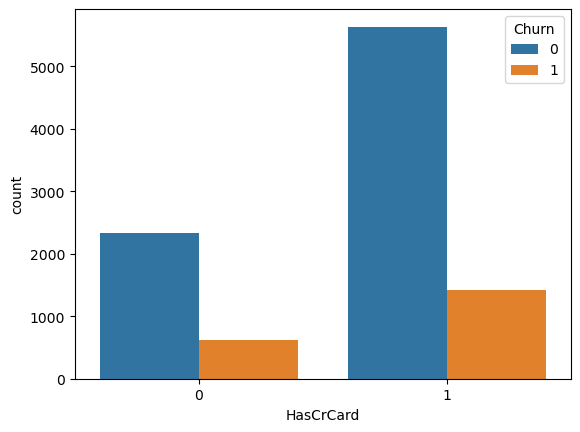

In [63]:
sns.countplot(x='HasCrCard',data=df,hue='Churn')

Majoity of the customers have credit cars i.e. nealy 70% of the customers have credit cards leaving 30% of the customers who do not have credit cards. Moreover, the number of customers leaving the bank are more whom have a credit card.

<Axes: xlabel='IsActiveMember', ylabel='count'>

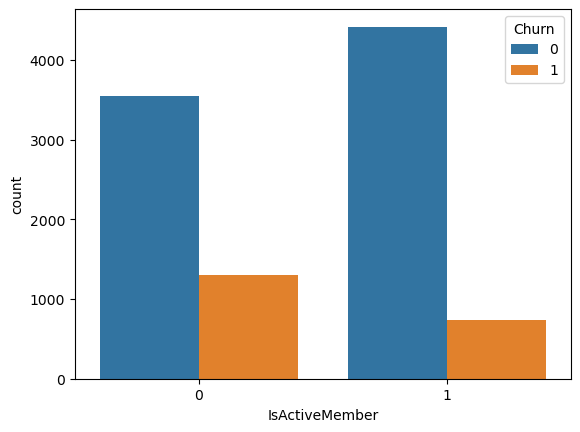

In [65]:
sns.countplot(x='IsActiveMember',data=df,hue='Churn')

As expected, the churn count is higher for non active members as compared to the active members of the bank. This is because the active members are more satisfied with the services of the bank and hence they are less likely to leave the bank. Therefore, the bank should focus on the non active members and try to improve their services to retain them.

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

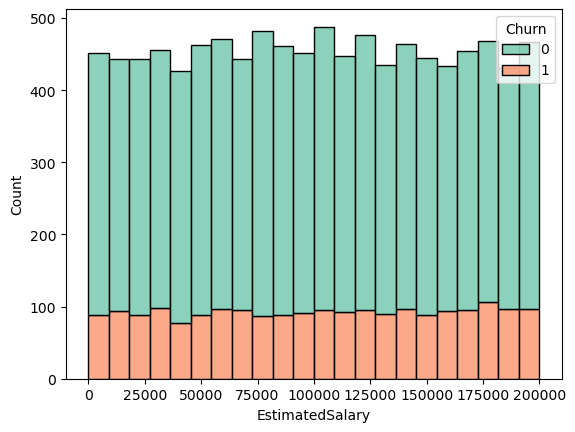

In [66]:
sns.histplot(data=df,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set2')

This graph shows the distribution of the estimated salary of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

### Data pre-Processing | 2